**REGRESSION PROBLEM**


**DEPENDENT VARIABLE-**

House Price- medv- continuous variable

**INDEPENDENT VARIABLES:**

crim-
per capita crime rate by town.

zn-
proportion of residential land zoned for lots over 25,000 sq.ft.

indus-
proportion of non-retail business acres per town.

chas-
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox-
nitrogen oxides concentration (parts per 10 million).

rm-
average number of rooms per dwelling.

age-
proportion of owner-occupied units built prior to 1940.

dis-
weighted mean of distances to five Boston employment centres.

rad-
index of accessibility to radial highways.

tax-
full-value property-tax rate per $10,000.

ptratio-
pupil-teacher ratio by town.

black-
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat-
lower status of the population (percent).

medv-
median value of owner-occupied homes in $1000s.

In [ ]:
#MOUNTING DATAFRAME

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/My Drive/Data202/HousingData.csv")

df=df.dropna()

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
df.shape

(394, 14)

In [ ]:
import numpy as np

# x and y
x = df['CRIM']
y = df['NOX']

# Number of data points
N = len(x)

# Calculate means
x_bar = sum(x) / N
y_bar = sum(y) / N

# Print mean
print(f"Mean of x: {x_bar}")
print(f"Mean of y: {y_bar}")

#Calculating covariance
cov_xy = 0
for xi, yi in zip(x, y):
    cov_xy += (xi - x_bar) * (yi - y_bar)
cov_xy = cov_xy / N

#Print covariance
print()
print(f"Covariance: {cov_xy}")

# Calculate standard deviations
# Standard Deviation of x
std_x = 0
for xi in x:
    std_x += (xi - x_bar) ** 2
sigma_x = (std_x / N) ** 0.5

# Standard Deviation of y
std_y = 0
for yi in y:
    std_y += (yi - y_bar) ** 2
sigma_y = (std_y / N) ** 0.5

# Print standard deviations
print()
print(f"Standard Deviation of x: {sigma_x}")
print(f"Standard Deviation of y: {sigma_y}")

# Calculating Cross Correlation
cross_corr = cov_xy / (sigma_x * sigma_y)

# Print Cross Correlation
print()
print(f"Cross-correlation: {cross_corr}")

Mean of x: 3.690136167512692
Mean of y: 0.5532154822335037

Covariance: 0.4320850446989293

Standard Deviation of x: 9.190736959443623
Standard Deviation of y: 0.11296886026574789

Cross-correlation: 0.41615982371878424


In [ ]:
from scipy.stats import pearsonr

# Compute the Pearson correlation coefficient
corr_coefficient = pearsonr(x, y)

# Print the result
print(f"Pearson correlation coefficient: {corr_coefficient[0]}")

Pearson correlation coefficient: 0.4161598237187843


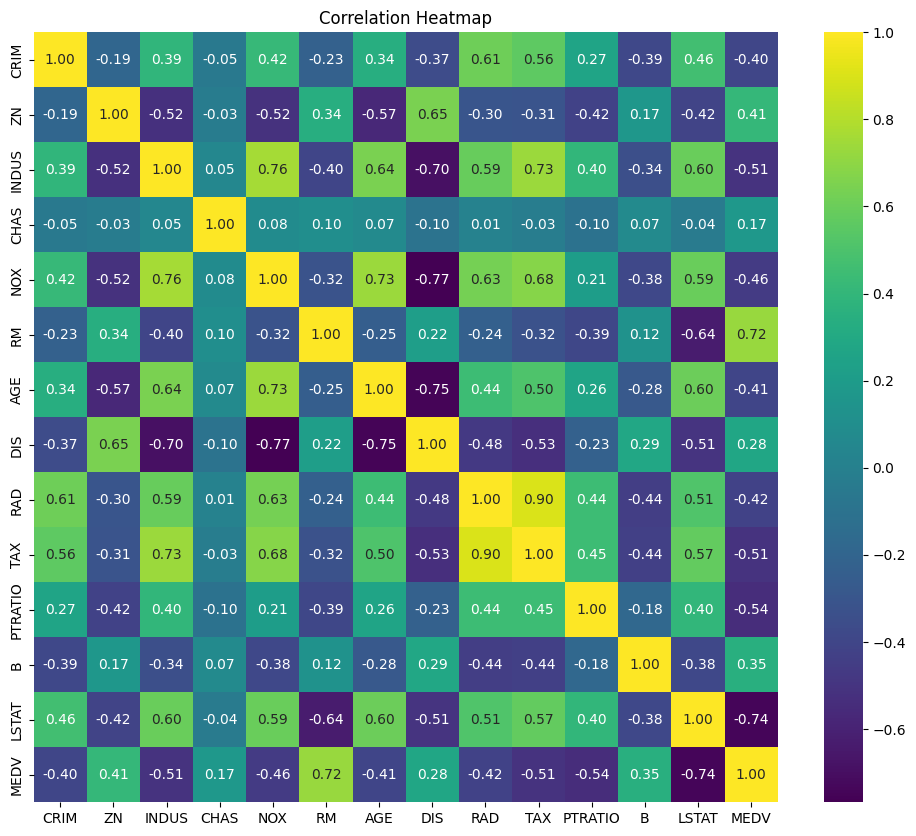

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hd_cleaned' is your cleaned DataFrame with housing data
correlation_matrix = df.corr()

# Set the size of the figure for better readability
plt.figure(figsize=(12,10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

#annot shows numerical values of the boxes
#cmap specifies the color map used for the heatmap. 'plasma' is a colormap that ranges from dark purple to bright yellow.
#the other colours are ‘viridis’, ‘plasma’, and ‘inferno’
#specifies the format of the annotations inside the heatmap cells. ".2f" means that the numbers will be displayed with two decimal places

# Add a title to the heatmap
plt.title('Correlation Heatmap')

# Save the heatmap as a PNG file
plt.savefig('correlation_heatmap_housing_data.png')

# Display the heatmap
plt.show()

Taking rm and lstat cus they are most correlated to medv

(rm- avg rooms, lstat-lower status of population, medv- house price)

its an inverse proportion. so if correlation increases, medv decreases and vice versa

r^2 measures amt of variance captured by data in the model.

In [ ]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split as tts
import sklearn.metrics as metrics
import numpy as np

In [ ]:
# define x and y- x is dataframe of two columns- rm and lstat, y= medv. so x is dataframe with 2 independent variables
# do a test train split=0.2 seed = 5
# create a linear regression model

# Defining X (independent variables) and y (dependent variable)
x = df[['RM', 'LSTAT']]
y = df['MEDV']

np.random.seed(5)

# Splitting the data into train and test sets with test_size=0.2 and random_state=5 for reproducibility
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=5)

# Initialize the linear regression model using alias lm
model = lm.LinearRegression()

# Fit the model using the training data
model.fit(x_train, y_train)

# Print the model's coefficients
print("Coefficient/Slope:", model.coef_)
print("Intercept:", model.intercept_)

r2_value = model.score(x_test, y_test)

# Print the R^2 value
print("R^2 value:", r2_value)

Coefficient/Slope: [ 5.68535595 -0.56823985]
Intercept: -5.912812981620537
R^2 value: 0.6900038035365312


In [ ]:
# Predict the values on the test set
y_pred = model.predict(x_test)

# Calculate the metrics
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = mse**0.2

# Print the values
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 24.818212041723815
Mean Absolute Error: 3.674284354167843
Root Mean Squared Error: 1.9008773600487177


In [ ]:
# adjusted r^2
n = len(y_test)
p = x_test.shape[1]
adjusted_r2 = 1 - ((1 - r2_value) * (n - 1) / (n - p - 1))

# Print Adjusted R^2
print("Adjusted R^2:", adjusted_r2)

Adjusted R^2: 0.6818460088927558


# 3 independent variables

In [ ]:
# define x and y- x is dataframe of two columns- rm and lstat, y= medv. so x is dataframe with 2 independent variables
# do a test train split=0.2 seed = 5
# create a linear regression model

# Defining X (independent variables) and y (dependent variable)
x = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']

np.random.seed(5)

# Splitting the data into train and test sets with test_size=0.2 and random_state=5 for reproducibility
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=5)

# Initialize the linear regression model using alias lm
model = lm.LinearRegression()

# Fit the model using the training data
model.fit(x_train, y_train)

# Print the model's coefficients
print("Coefficient/Slope:", model.coef_)
print("Intercept:", model.intercept_)

r2_value = model.score(x_test, y_test)

# Print the R^2 value
print("R^2 value:", r2_value)

Coefficient/Slope: [ 4.88152888 -0.50789568 -1.02029294]
Intercept: 17.26074628440975
R^2 value: 0.7214697905241034


In [ ]:
# Predict the values on the test set
y_pred = model.predict(x_test)

# Calculate the metrics
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = mse**0.2

# Print the values
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 22.299053593753253
Mean Absolute Error: 3.2880140261338604
Root Mean Squared Error: 1.8606182920436591


In [ ]:
# adjusted r^2
n = len(y_test)
p = x_test.shape[1]
adjusted_r2 = 1 - ((1 - r2_value) * (n - 1) / (n - p - 1))

# Print Adjusted R^2
print("Adjusted R^2:", adjusted_r2)

Adjusted R^2: 0.7103285821450676


# ALL INDEPENDENT VARIABLES

In [ ]:
x = df[['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT' ]]
y = df['MEDV']

np.random.seed(5)

# Splitting the data into train and test sets with test_size=0.2 and random_state=5 for reproducibility
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=5)

# Initialize the linear regression model using alias lm
model = lm.LinearRegression()

# Fit the model using the training data
model.fit(x_train, y_train)

# Print the model's coefficients
print("Coefficient/Slope:", model.coef_)
print("Intercept:", model.intercept_)

r2_value_all = model.score(x_test, y_test)

# Print the R^2 value
print("R^2 value:", r2_value_all)

Coefficient/Slope: [-8.62022421e-02  5.25502501e-02  4.17534847e-02  1.79848634e+00
 -1.76811112e+01  4.33963109e+00 -9.16572159e-03 -1.47586716e+00
  3.11617835e-01 -1.39607788e-02 -9.35649680e-01  1.26682369e-02
 -4.36110622e-01]
Intercept: 31.54292687901805
R^2 value: 0.7714138176638424


In [ ]:
# Predict the values on the test set
y_pred = model.predict(x_test)

# Calculate the metrics
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = mse**0.2

# Print the values
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 18.30054822526006
Mean Absolute Error: 3.1236513932765053
Root Mean Squared Error: 1.7885159601009568


In [ ]:
# Number of observations
n = len(y_test)

# Number of independent variables (features)
p = x_test.shape[1]  # You mentioned having 13 independent variables

# Calculate Adjusted R^2
adjusted_r2_all = 1 - ((1 - r2_value_all) * (n - 1) / (n - p - 1))

# Print Adjusted R^2
print("Adjusted R^2:", adjusted_r2_all)

Adjusted R^2: 0.725696581196611
